####
## Credit Score Card Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('credit_data.csv')
# read the csv

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      10000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  10000 non-null  float64
 2   age                                   10000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  10000 non-null  int64  
 4   DebtRatio                             10000 non-null  float64
 5   MonthlyIncome                         8026 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       10000 non-null  int64  
 7   NumberOfTimes90DaysLate               10000 non-null  int64  
 8   NumberRealEstateLoansOrLines          10000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  10000 non-null  int64  
 10  NumberOfDependents                    9716 non-null   float64
dtypes: float64(4), i

## 1.1 Pre-process of the dataset:
### 1.1 Carefully pre-process the dataset by considering the following activities: (30 marks)
•	Exploratory data analysis.
•	Missing value handling (if any), including a suitable analysis of missing values and justification of the chosen method.
•	Outlier detection and treatment (if any), with appropriate analysis/justification.
•	Binning the variables (if deemed useful)
•	Coding the discrete variables using Weights of Evidence.
•	Splitting the data set into a training and test set.

In [4]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      10000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  10000 non-null  float64
 2   age                                   10000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  10000 non-null  int64  
 4   DebtRatio                             10000 non-null  float64
 5   MonthlyIncome                         8026 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       10000 non-null  int64  
 7   NumberOfTimes90DaysLate               10000 non-null  int64  
 8   NumberRealEstateLoansOrLines          10000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  10000 non-null  int64  
 10  NumberOfDependents                    9716 non-null   float64
dtypes: float64(4), i

In [6]:
df.drop_duplicates(inplace=True)  # delete the duplicate information
df.index = range(df.shape[0])  #update the index

We could find that the 'MonthlyIncome' & 'NumberOfDependents' are uncompleted.

In [7]:
df['MonthlyIncome'].value_counts().head()

5000.0     171
4000.0     159
6000.0     138
10000.0    112
2500.0     110
Name: MonthlyIncome, dtype: int64

In [8]:
df['NumberOfDependents'].value_counts().head()

0.0    5816
1.0    1732
2.0    1326
3.0     576
4.0     194
Name: NumberOfDependents, dtype: int64

For missing data values, I used RandomForest for completion.

In [9]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


def set_missing_Monthly_income(df):
    # Put the known data into Model of RandomForestRegressor
    income_df = df[['MonthlyIncome',
                    'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
                    'age', 'NumberOfTime30-59DaysPastDueNotWorse',
                    'NumberOfTime60-89DaysPastDueNotWorse', 'DebtRatio',
                    'NumberOfOpenCreditLinesAndLoans',
                    'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines'
                    ]]

    known_info = income_df[income_df.MonthlyIncome.notnull()].values
    unknown_info = income_df[income_df.MonthlyIncome.isnull()].values

    y = known_info[:, 0]
    X = known_info[:, 1:]

    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    # fit X & y, build the model
    # run Random Forest

    # do the prediction
    prediction = rfr.predict(unknown_info[:, 1::])

    df.loc[(df.MonthlyIncome.isnull()), 'MonthlyIncome'] = np.round(prediction, 0)

    return df


def set_missing_NumberOfDependents(df):
    # Put the known data into Model of RandomForestRegressor
    dependents_df = df[['NumberOfDependents',
                        'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
                        'age', 'NumberOfTime30-59DaysPastDueNotWorse',
                        'NumberOfTime60-89DaysPastDueNotWorse', 'DebtRatio',
                        'NumberOfOpenCreditLinesAndLoans',
                        'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines'
                        ]]

    known_info = dependents_df[dependents_df.NumberOfDependents.notnull()].values
    unknown_info = dependents_df[dependents_df.NumberOfDependents.isnull()].values

    y = known_info[:, 0]
    X = known_info[:, 1:]

    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    # fit X & y, build the model
    # run Random Forest

    # do the prediction
    prediction = rfr.predict(unknown_info[:, 1::])

    df.loc[(df.NumberOfDependents.isnull()), 'NumberOfDependents'] = np.round(prediction, 0)

    return df


In [10]:
df = set_missing_Monthly_income(df)
df = set_missing_NumberOfDependents(df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      9996 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  9996 non-null   float64
 2   age                                   9996 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  9996 non-null   int64  
 4   DebtRatio                             9996 non-null   float64
 5   MonthlyIncome                         9996 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       9996 non-null   int64  
 7   NumberOfTimes90DaysLate               9996 non-null   int64  
 8   NumberRealEstateLoansOrLines          9996 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  9996 non-null   int64  
 10  NumberOfDependents                    9996 non-null   float64
dtypes: float64(4), in

In [12]:
df.to_csv('Credit_data_new.csv')

Outlier handling

In [13]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,0.064026,4.932779,52.174770,0.385254,350.597487,5407.781813,8.348139,0.231593,1.008403,0.202281,0.734394
std,0.244811,160.511763,14.772152,3.724470,2244.421925,6642.975412,5.065953,3.692276,1.084489,3.676718,1.116783
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.031118,41.000000,0.000000,0.173920,1840.500000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.165142,52.000000,0.000000,0.367207,4422.500000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.571614,62.000000,0.000000,0.848781,7416.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,9340.000000,101.000000,98.000000,168835.000000,208333.000000,46.000000,98.000000,17.000000,98.000000,20.000000


We could find that there is something abnormal for the column 'RevolvingUtilizationOfUnsecuredLines'
I chose to delete the data that exceeded the mean by two standard deviations.

In [14]:
# Define a function that detects data two standard deviations above the mean as outliers

def detect_outliers(filename, attribute, threshold=4):
    outliers_ll = filename[attribute].mean() - threshold * filename[attribute].std()
    outliers_ul = filename[attribute].mean() + threshold * filename[attribute].std()
    # Flag outliers
    filename[attribute] = filename[attribute].apply(lambda x: x if outliers_ul >= x >= outliers_ll else np.nan)

    return filename

# df = detect_outliers(df, 'RevolvingUtilizationOfUnsecuredLines')
# df.dropna(subset=['RevolvingUtilizationOfUnsecuredLines'], inplace=True)

In [15]:
df = detect_outliers(df, 'RevolvingUtilizationOfUnsecuredLines')
df.dropna(subset=['RevolvingUtilizationOfUnsecuredLines'], inplace=True)

In [16]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [17]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000
mean,0.063708,0.328064,52.186818,0.385355,351.009420,5406.886707,8.351598,0.231794,1.008314,0.202544,0.733848
std,0.244245,0.364239,14.772131,3.726802,2245.849886,6646.505771,5.067031,3.694663,1.084504,3.679105,1.116704
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.031040,41.000000,0.000000,0.173972,1833.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163879,52.000000,0.000000,0.367323,4416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.569015,62.000000,0.000000,0.850214,7416.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,5.299401,101.000000,98.000000,168835.000000,208333.000000,46.000000,98.000000,17.000000,98.000000,20.000000


In [18]:
df = detect_outliers(df, 'NumberOfTime30-59DaysPastDueNotWorse')
df.dropna(subset=['NumberOfTime30-59DaysPastDueNotWorse'], inplace=True)

In [19]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000
mean,0.063096,0.327120,52.218377,0.248270,351.499050,5411.895677,8.363326,0.094493,1.009730,0.065202,0.734878
std,0.243147,0.363623,14.753450,0.711952,2247.388426,6649.516444,5.060905,0.475207,1.084606,0.320766,1.117149
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030992,41.000000,0.000000,0.174903,1850.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163256,52.000000,0.000000,0.367628,4428.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.567427,62.000000,0.000000,0.852236,7416.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,5.299401,101.000000,12.000000,168835.000000,208333.000000,46.000000,10.000000,17.000000,6.000000,20.000000


In [20]:
# Since the outliers of the debtratio distribution are too large, exceeding the range of 3 standard deviations, I set the range of standard deviations here as 8
df = detect_outliers(df, 'DebtRatio', 8)
df.dropna(subset=['DebtRatio'], inplace=True)

In [21]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000
mean,0.063108,0.327170,52.216113,0.248319,323.498247,5412.895455,8.363098,0.094512,1.009632,0.065215,0.734825
std,0.243170,0.363640,14.753682,0.712014,987.527464,6649.806342,5.061383,0.475252,1.084484,0.320797,1.117165
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030994,41.000000,0.000000,0.174878,1850.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163401,52.000000,0.000000,0.367554,4430.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.567574,62.000000,0.000000,0.850214,7416.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,5.299401,101.000000,12.000000,15466.000000,208333.000000,46.000000,10.000000,17.000000,6.000000,20.000000


In [22]:
#On the NumberOfDependents column, there is only one value of 20, which is much larger than the remaining branch, and I simply delete it
df = df.drop(df[df['NumberOfDependents'] == 20].index)

In [23]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,9966.000000,9966.000000,9966.000000,9966.000000,9966.000000,9966.000000,9966.000000,9966.000000,9966.000000,9966.000000,9966.000000
mean,0.063115,0.327180,52.217339,0.248244,323.530649,5412.804836,8.362834,0.094321,1.009633,0.065222,0.732892
std,0.243181,0.363657,14.753915,0.712010,987.571714,6650.133838,5.061568,0.474893,1.084539,0.320813,1.100424
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030993,41.000000,0.000000,0.174866,1850.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163328,52.000000,0.000000,0.367543,4429.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.567648,62.000000,0.000000,0.850491,7416.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,5.299401,101.000000,12.000000,15466.000000,208333.000000,46.000000,10.000000,17.000000,6.000000,8.000000


In [24]:
# Excessive Monthly Income is generated according to the Random Forest model, so I directly delete the data exceeding 6 standard deviations.
df = detect_outliers(df, 'MonthlyIncome', 6)
df.dropna(subset=['MonthlyIncome'], inplace=True)

In [25]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,9930.000000,9930.000000,9930.000000,9930.000000,9930.000000,9930.000000,9930.000000,9930.000000,9930.000000,9930.000000,9930.000000
mean,0.063142,0.327519,52.194663,0.247633,324.677714,5158.832628,8.357704,0.094663,1.006848,0.065358,0.732024
std,0.243230,0.363919,14.745461,0.711761,989.173688,4657.365963,5.057484,0.475719,1.078336,0.321233,1.100175
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.031045,41.000000,0.000000,0.175969,1833.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163606,52.000000,0.000000,0.368618,4412.500000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.568279,62.000000,0.000000,0.855183,7367.500000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,5.299401,101.000000,12.000000,15466.000000,45000.000000,46.000000,10.000000,17.000000,6.000000,8.000000


The processing of outliers is preliminarily completed
(Outliers exist for variables NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate and NumberOfTime60-89DaysPastDueNotWorse. In addition, it can be known from the unique function that there are two outliers, 96 and 98, so they are eliminated. At the same time, it will be found that the 96 and 98 values of one variable will be removed, and the 96 and 98 values of other variables will be removed accordingly.)

In [26]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2.0,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0.0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1.0,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0.0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.213179,74,0.0,0.375607,3500.0,3,0,1,0,1.0


Binning the variables (if deemed useful) and Coding the discrete variables using Weights of Evidence.
Feature Engineering

A function is defined here for the calculation of WOE and IV


In [27]:
def get_bin_graph(DF, X, Y, n=2, q=20, graph=True):
    global bins_df
    DF = DF[[X, Y]]
    DF['qcut'], updown = pd.qcut(DF[X], retbins=True, q=q, duplicates='drop')
    count_0 = DF[DF[Y] == 0].groupby(by='qcut').count()[Y]
    count_1 = DF[DF[Y] == 1].groupby(by='qcut').count()[Y]
    num_bins = [*zip(updown, updown[1:], count_0, count_1)]
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [
                (num_bins[0][0], num_bins[1][1], num_bins[0][1] + num_bins[1][2], num_bins[0][3] + num_bins[1][3])]
            continue
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i - 1:i + 1] = [(num_bins[i - 1][0], num_bins[i][1], num_bins[i - 1][2] + num_bins[i][2],
                                          num_bins[i + 1][3] + num_bins[i][3])]
                break
        else:
            break

    def get_woe(num_bins):  # WOE
        column = ['min', 'max', 'good', 'bad']
        df = pd.DataFrame(num_bins, columns=column)
        df['total'] = df['good'] + df['bad']
        df['pre'] = df['total'] / df['total'].sum()
        df['good%'] = df['good'] / df['good'].sum()
        df['bad%'] = df['bad'] / df['bad'].sum()
        df['bad_ration'] = df['bad'] / df['total']
        df['woe'] = np.log(df['good%'] / df['bad%'])
        return df

    def get_iv(bins_df):  #IV value
        rato = bins_df['good%'] - bins_df['bad%']
        iv = np.sum(rato * bins_df['woe'])
        return iv

    iv = []
    axis = []
    while len(num_bins) > n:  #Chi-square division
        psv = []
        for i in range(len(num_bins) - 1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i + 1][2:]
            pv = chi2_contingency([x1, x2])[0]
            psv.append(pv)
        min_index = psv.index(min(psv))
        num_bins[min_index:min_index + 2] = [(num_bins[min_index][0], num_bins[min_index + 1][1],
                                              num_bins[min_index][2] + num_bins[min_index + 1][2],
                                              num_bins[min_index][3] + num_bins[min_index + 1][3])]
        bins_df = pd.DataFrame(get_woe(num_bins))
        axis.append(len(num_bins))
        iv.append(get_iv(bins_df))
    return bins_df, axis, iv

<ipython-input-27-903ada1c028c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['qcut'], updown = pd.qcut(DF[X], retbins=True, q=q, duplicates='drop')
<ipython-input-27-903ada1c028c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['qcut'], updown = pd.qcut(DF[X], retbins=True, q=q, duplicates='drop')
<ipython-input-27-903ada1c028c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

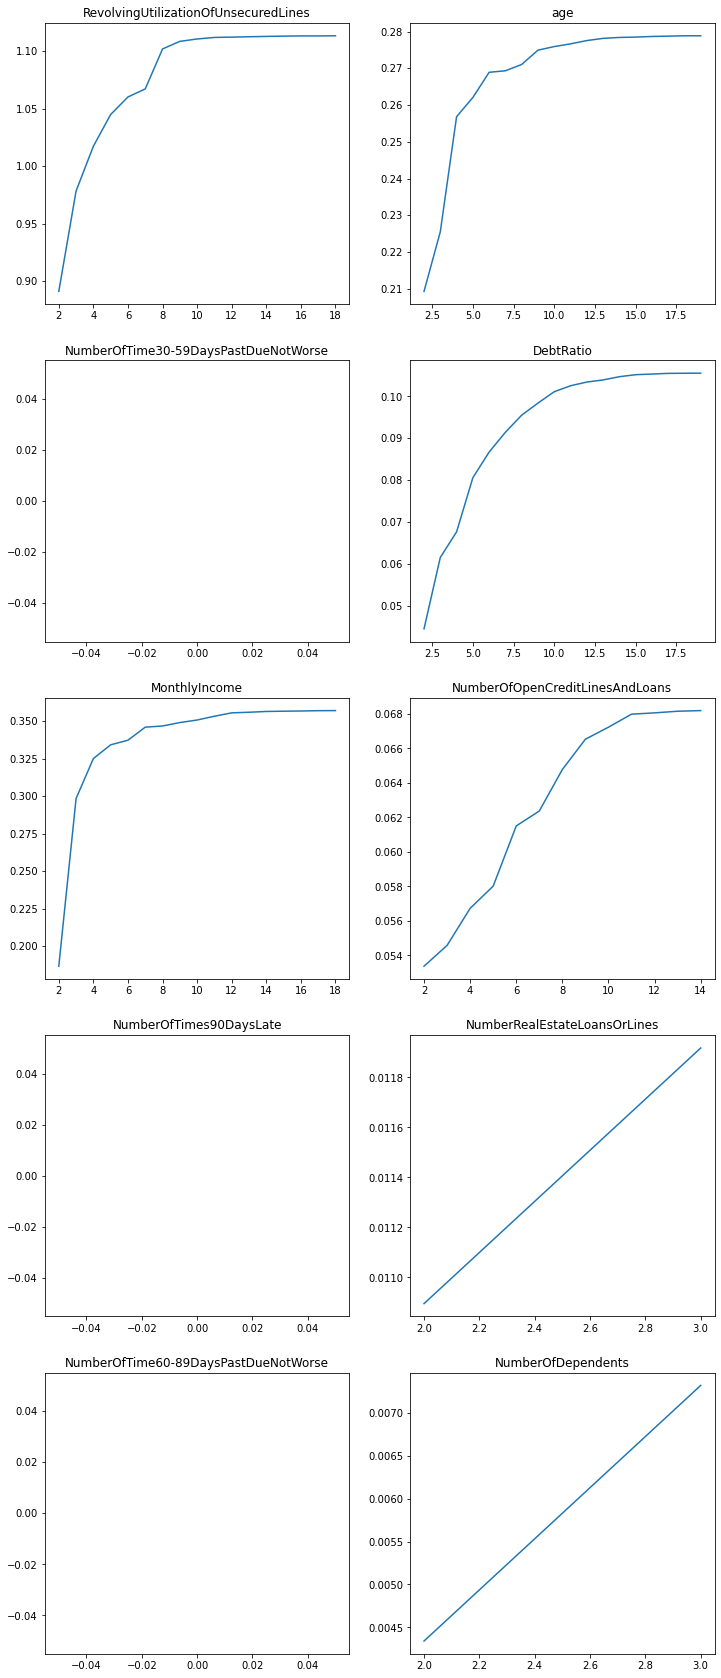

In [28]:
column = df.columns
count = 1
plt.figure(figsize=(12, 5 * 6))
for feature in column[1:]:
    bins_df, axis, iv = get_bin_graph(df, feature, 'SeriousDlqin2yrs', n=2, q=20)
    ax = plt.subplot(5, 2, count)
    count += 1
    plt.plot(axis, iv)
    plt.title(feature)
plt.show()

In [29]:
auto_col_bin = {'RevolvingUtilizationOfUnsecuredLines': 8
    , 'age': 9
    , 'DebtRatio': 7
    , 'MonthlyIncome': 8
    , 'NumberOfOpenCreditLinesAndLoans': 9}
# In the results of correct container division shown in the figure above
# we choose the best number of containers. The selection principle is: when the number of containers is small, the IV value is large

In [30]:
hand_bins = {'NumberOfTime30-59DaysPastDueNotWorse': [0, 1, 2, 12]
    , 'NumberOfTimes90DaysLate': [0, 1, 2, 10]
    , 'NumberRealEstateLoansOrLines': [0, 1, 2, 17]
    , 'NumberOfTime60-89DaysPastDueNotWorse': [0, 1, 2, 6]
    , 'NumberOfDependents': [0, 1, 2, 8]}
# For those features without image features need to be manually divided again

In [31]:
hand_bins = {k: [-np.inf, *v[:-1], np.inf] for k, v in hand_bins.items()}
# We add negative infinity and positive infinity to the lower and upper bounds of the partition, and classify those greater than the upper bound and those less than the lower bound

In [32]:
bins_of_col = {}

for col in auto_col_bin:
    bins_df, axis, iv = get_bin_graph(df, col, 'SeriousDlqin2yrs', n=auto_col_bin[col], q=20, graph=True)
    bins_list = sorted(set(bins_df['min']).union(bins_df['max']))
    bins_list[0], bins_list[-1] = -np.inf, np.inf
    bins_of_col[col] = bins_list

bins_of_col.update(hand_bins)

<ipython-input-27-903ada1c028c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['qcut'], updown = pd.qcut(DF[X], retbins=True, q=q, duplicates='drop')
<ipython-input-27-903ada1c028c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['qcut'], updown = pd.qcut(DF[X], retbins=True, q=q, duplicates='drop')
<ipython-input-27-903ada1c028c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [33]:
def get_woe(df, col, y, bin):
    df = df[[col, y]].copy()
    df['cut'] = pd.cut(df[col], bin)
    bins_df = df.groupby('cut')[y].value_counts().unstack()
    woe = np.log((bins_df[1] / bins_df[1].sum()) / (bins_df[0] / bins_df[0].sum()))
    return woe


woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(df, col, 'SeriousDlqin2yrs', bins_of_col[col])

In [34]:
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.00332]     -0.705093
 (0.00332, 0.0106]   -2.406778
 (0.0106, 0.279]     -1.110890
 (0.279, 0.456]      -0.473590
 (0.456, 0.711]       0.262436
 (0.711, 0.863]       0.874468
 (0.863, 1.0]         1.213477
 (1.0, inf]           2.093855
 dtype: float64,
 'age': cut
 (-inf, 33.0]    0.593012
 (33.0, 39.0]    0.241788
 (39.0, 41.0]    0.471236
 (41.0, 48.0]    0.268729
 (48.0, 56.0]    0.086961
 (56.0, 58.0]   -0.860398
 (58.0, 65.0]   -0.354254
 (65.0, 68.0]   -1.450514
 (68.0, inf]    -1.026721
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.0341]    -0.447847
 (0.0341, 0.215]    0.021920
 (0.215, 0.417]    -0.336457
 (0.417, 0.855]     0.289322
 (0.855, 3.182]     0.633452
 (3.182, 1234.0]    0.132196
 (1234.0, inf]     -0.177378
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 1.0]          -1.760773
 (1.0, 820.0]          0.717471
 (820.0, 3000.0]       0.434509
 (3000.0, 4000.0]      0.331741
 (4000.0, 6628.6]      0.018275
 (6628.

In [35]:
df_woe = pd.DataFrame(index=df.index)
for col in bins_of_col:
    df_woe[col] = pd.cut(df[col], bins_of_col[col]).map(woeall[col])

df_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.874468,0.268729,0.289322,-0.374073,-0.088229,1.574319,-0.373538,0.320048,-0.307647,0.207301
1,1.213477,0.471236,0.021920,0.434509,-0.012903,-0.492707,-0.373538,0.252744,-0.307647,0.206130
2,0.262436,0.241788,0.021920,0.331741,0.556447,0.864299,1.958816,0.252744,-0.307647,-0.118563
3,-1.110890,0.593012,0.021920,0.331741,-0.012903,-0.492707,-0.373538,0.252744,-0.307647,-0.118563
5,-1.110890,-1.026721,-0.336457,0.331741,0.361195,-0.492707,-0.373538,-0.361831,-0.307647,0.206130


Splitting the data set into a training and test set.

In [36]:
df_new = pd.concat([df['SeriousDlqin2yrs'], df_woe], axis=1)
df_new.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.874468,0.268729,0.289322,-0.374073,-0.088229,1.574319,-0.373538,0.320048,-0.307647,0.207301
1,0,1.213477,0.471236,0.021920,0.434509,-0.012903,-0.492707,-0.373538,0.252744,-0.307647,0.206130
2,0,0.262436,0.241788,0.021920,0.331741,0.556447,0.864299,1.958816,0.252744,-0.307647,-0.118563
3,0,-1.110890,0.593012,0.021920,0.331741,-0.012903,-0.492707,-0.373538,0.252744,-0.307647,-0.118563
5,0,-1.110890,-1.026721,-0.336457,0.331741,0.361195,-0.492707,-0.373538,-0.361831,-0.307647,0.206130


In [37]:
# Divide features into X and labels into Y
x = df_new.iloc[:, 1:]
y = df_new.iloc[:, 0]

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Split the data set into a training and test set (percentage as 0.3 and 0.7)

### 1.2 Build an intuitive and predictive scorecard using a logistic regression classifier and report the following: (30 marks)
•	The most important variables
•	The impact of the variables on the target
•	The performance of the model. Use various performance metrics and discuss their relationship if any.
•	Compare this scorecard with the result of a Random Forest model run over the data. Discuss your results.
•	Why do banks typically use Logistic Regression as their base classifier? What do banks win and lose by doing this?


Then we start to do the data modeling using a logistic regression model

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, auc, roc_curve

# The performance of the model on the test set was evaluated by the area AUC of the ROC curve

lr = LogisticRegression()
lr.fit(x_train, y_train)

# prob = lr.predict_proba(x_test)
# prob = prob[:, -1]
# fpt, tpr, th = roc_curve(y_test, prob)
# AUC = auc(fpt, tpr)
# print('the AUC is :%f' % AUC)

score = roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1])
print('the AUC is :%f' % score)



# AUC value is 0.869, indicating that the prediction effect of this model is good and the accuracy is high

the AUC is :0.853923


Then we start to set up a scorecard
Score = offset + factor * log(odds)
Before setting up a standard scorecard, we need to pick a few scorecard parameters: the base score, the PDO (the score where the ratio doubles), and the good/bad ratio. Here, we take 600 as the base score, the PDO is 20 (every 20 points higher doubles the good/bad ratio), and the good/bad ratio is 20.

In [40]:
B = 20 / np.log(2)
A = 600 + B * np.log(1 / 60)
base_score = A - B * lr.intercept_  #basic score

filename = 'card.csv'
with open(filename, 'w') as fdata:
    fdata.write('base_score,{}\n'.format(base_score))
# write into a new csv file

for i, col in enumerate(x.columns):
    score = woeall[col] * (-B * lr.coef_[0][i])
    score.name = 'Score'
    score.index.name = col
    score.to_csv(filename, header=True, mode='a')

In [41]:
df_score = pd.read_csv('card.csv')

df_score.head()
# scorecard has been made

,base_score,[559.24369722]
0,RevolvingUtilizationOfUnsecuredLines,Score
1,"(-inf, 0.00332]",10.961010609439878
2,"(0.00332, 0.0106]",37.414526037452724
3,"(0.0106, 0.279]",17.269331534467238
4,"(0.279, 0.456]",7.3621831652190455


•	The most important variables
    According to the scorecard score, all variables of each interval can infer RevolvingUtilizationOfUnsecuredLines is one of the most important variables.

•	The impact of the variables on the target
    According to scorecard, the specific value of each variable has a different effect on the target. Refer to scorecard for details.

•	The performance of the model.Use various performance metrics and discuss their relationship if any.
    AUC value is 0.869, indicating that the prediction effect of this model is good and the accuracy is high

•	Compare this scorecard with the result of a Random Forest model run over the data.
    Discuss your results.
    The result is under here. The auc score is 84.7%, lower than the lr model.
    Therefore, the LogisticRegression is better than the RandomForest model

In [42]:
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

rfr = RandomForestClassifier(random_state=33543984, n_estimators=2000, n_jobs=-1)
rfr.fit(x_train, y_train)

score = roc_auc_score(y_test, rfr.predict_proba(x_test)[:, 1])
print('the AUC is :%f' % score)


# the auc score is 82.1%, lower than the lr model.

the AUC is :0.832899



•	Why do banks typically use Logistic Regression as their base classifier?    What do banks win and lose by doing this?
    Because logistic regression model accuracy and score is higher. In addition, the numerical influence of each eigenvalue can be judged. The influence of each feature on the output is calculated, and the interpretation is strong.
    Its disadvantages are:
1. Feature correlation) Because it is a linear classifier in nature, it can't handle the correlation between features well.
2. (Feature space) When the feature space is large, the performance is not good.
3. (accuracy) easy to underfit, accuracy is not high.